# Spatial Warping

In [2]:
'''Name: Royston Marian Mascarenhas 
   Submission date: 3rd March, 2019'''

'Name: Royston Marian Mascarenhas \n   ID: 8286328166\n   Email: rmascare@usc.edu\n   Submission date: 3rd March, 2019'

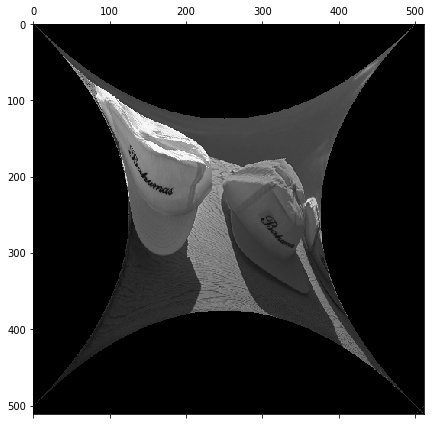

In [6]:
import numpy as np
from matplotlib import pyplot as plt

height1 = 512
width1 = 512
Img1 = open('hat.raw','rb').read()
Img1 = np.frombuffer(Img1,np.uint8)
ImageP1 = Img1[0:height1*width1]
ImageP1 = np.reshape(ImageP1,(height1,width1))
#plt.figure(1,figsize=(10,12))
#plt.matshow(ImageP1,cmap='gray',fignum=1)

a01 = np.array([0,-0.0020,1.002,0.0020,0,-0.0020])
b01 = np.array([0,0.0000,1.0000,0.0000,0,0.0000])
tr1 = np.vstack((a01,b01))

a02 = np.array([0,1.0000,0.0000,0.0000,0.0000,0.0000])
b02 = np.array([0,1.0020,-0.0020,-0.0020,0.0000,0.0020])
tr2 = np.vstack((a02,b02))

a03 = np.array([0.0000,2.0020,-1.0020,-0.0020,0.0000,0.0020])
b03 = np.array([0.0000,0,1.0000,0.0000,0.0000,0.0000])
tr3 = np.vstack((a03,b03))

a04 = np.array([0,1.0000,0,0.0000,0.0000,0.0000])
b04 = np.array([0,-1.0020,2.0020,0.0020,0.0000,-0.0020])
tr4 = np.vstack((a04,b04))

#upper triangle
sample1 = np.zeros((512,512))
outco = np.zeros((2,1))
for i in range(0,512):
    for j in range(i,512-i):
        mat = np.array([1,i,j,i**2,i*j,j**2])
        outco = np.matmul(tr1,np.transpose(mat))
        xn = int(np.rint(outco[0]))
        yn = int(np.rint(outco[1]))
        sample1[xn,yn] = ImageP1[i,j]

#left triangle
outco = np.zeros((2,1))
for col in range(0,512):
    for row in range(col,512-col):
        mat = np.array([1,row,col,row**2,row*col,col**2])
        outco = np.matmul(tr2,np.transpose(mat))
        xn = int(np.rint(outco[0]))
        yn = int(np.rint(outco[1]))
        sample1[xn,yn] = ImageP1[row,col]



#lower traingle

outco = np.zeros((2,1))
for i in range(511,0,-1):
    for j in range(512-i,i):
        mat = np.array([1,i,j,i**2,i*j,j**2])
        outco = np.matmul(tr3,np.transpose(mat))
        xn = int(np.rint(outco[0]))
        yn = int(np.rint(outco[1]))
        sample1[xn,yn] = ImageP1[i,j]

#right triangle
outco = np.zeros((2,1))
for col in range(511,0,-1):
    for row in range(511-col,col+1):
        mat = np.array([1,row,col,row**2,row*col,col**2])
        outco = np.matmul(tr4,np.transpose(mat))
        xn = int(np.rint(outco[0]))
        yn = int(np.rint(outco[1]))
        sample1[xn,yn] = ImageP1[row,col]
    
plt.figure(2,figsize=(7,7))
plt.matshow(sample1,cmap='gray',fignum=2)